## Color Identification using OpenCV

### This project is made possible thanks to towardsdatascience.com and Sparks Foundations

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os
import pandas as pd
%matplotlib inline

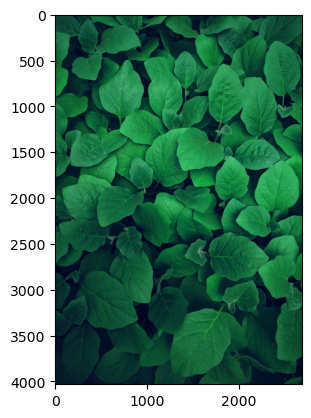

In [8]:
img = os.path.join('images', 'image_1.jpg')
img = cv2.imread(img)
# convert default BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img);

In [9]:
# this function simply converts int(decimal) values to hex
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [10]:
# return img as np array in correct RGB format
def get_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

In [20]:
def get_colors(image, number_of_colors, show_chart):
    # INTER_AREA is used when we want to shrink the image
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    # KMeans expects the input to be of two dimensions
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    print(labels)
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]
    
    if (show_chart):
        plt.figure(figsize = (8, 6));
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors);
    return rgb_colors

AttributeError: 'NoneType' object has no attribute 'split'

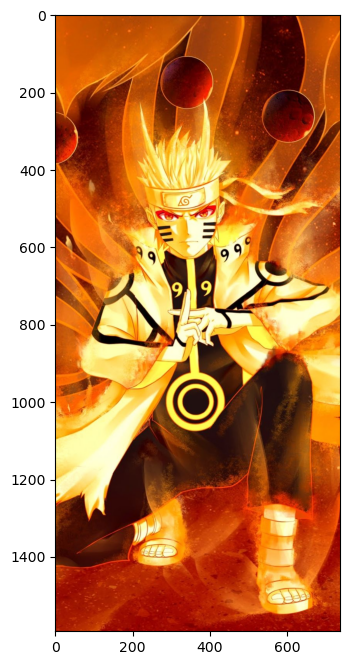

In [23]:
# let's extract the colors from my favourite anime
img_path = os.path.join('images', 'naruto.jpg')
image = get_image(img_path)
plt.figure(figsize = (12, 8))
plt.imshow(image);
get_colors(image, 4, True)

In [13]:
IMAGE_DIRECTORY = 'images'
COLORS = {
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 255, 0]
}

images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

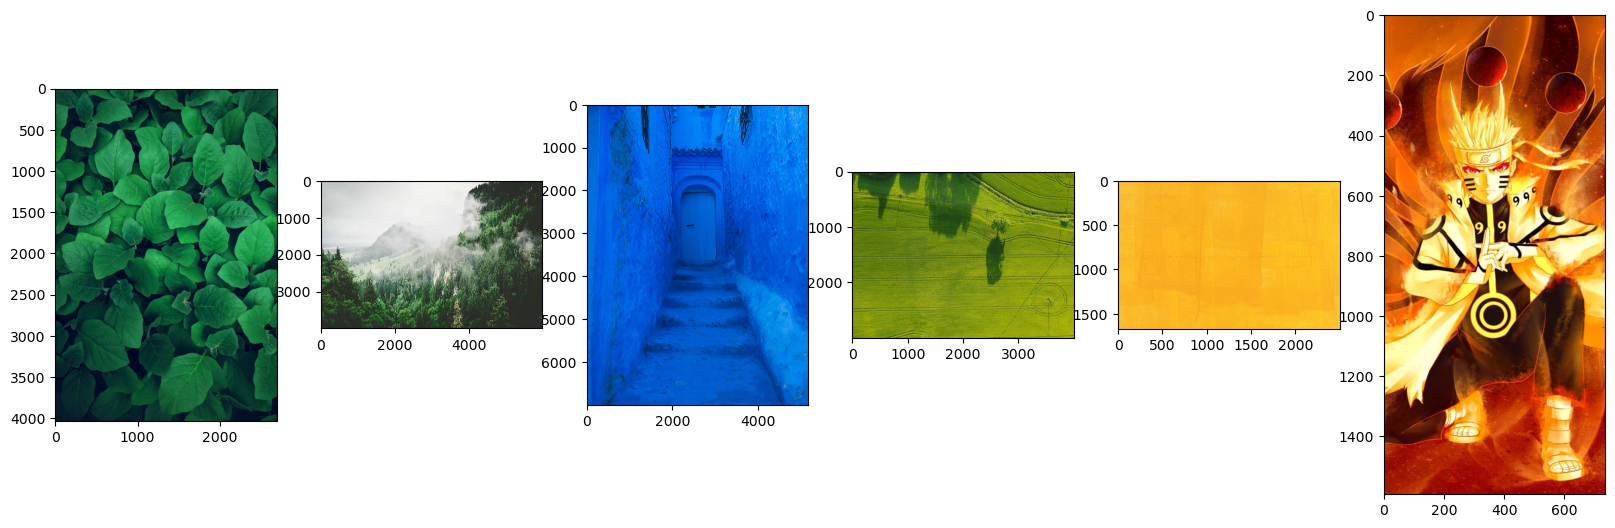

In [14]:
plt.figure(figsize=(20, 20))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

In [15]:
def match_image_by_color(image, color, threshold=60, number_of_colors=10):
    image_colors = get_colors(image, number_of_colors, False)
    # this returns the color in a format that we can compare
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))
    
    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

In [16]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    for i in range(len(images)):
        selected = match_image_by_color(images[i], color, threshold, colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

### Now let's try it on the green color

In [17]:
plt.figure(figsize = (20, 10))
selected_color = COLORS['GREEN']
show_selected_images(images, selected_color, 60, 5)

AttributeError: 'NoneType' object has no attribute 'split'

<Figure size 2000x1000 with 0 Axes>

#### tuturial link: https://towardsdatascience.com/color-identification-in-images-machine-learning-application-b26e770c4c71